Author: Arjun Kumaran

All the Functions used in this notebook can be found in the Helper_Function_Hypothesis_2.py file

In [1]:
import os
import pandas as pd
import numpy as np
import requests, zipfile, io
from matplotlib import rcParams
rcParams['figure.figsize'] = 11.7,15
import Helper_Function_Hypothesis_2 as hf

import warnings
warnings.filterwarnings("ignore")

In [2]:
pd.set_option('display.max_rows', 10000)
pd.set_option('display.max_columns', 50)
pd.set_option('expand_frame_repr', False)

In [3]:
df = pd.read_csv("https://github.com/Venkat3103/2022Fall_projects/blob/main/ipl_2018_2020_bbb.csv?raw=true")
match_info = pd.read_csv("https://raw.githubusercontent.com/Venkat3103/2022Fall_projects/main/ipl_match_info.csv")
bowler_info = pd.read_excel("https://github.com/Venkat3103/2022Fall_projects/blob/main/bowler_info.xlsx?raw=true")
teamsheet = pd.read_csv('https://raw.githubusercontent.com/Venkat3103/2022Fall_projects/main/teamsheet.csv')

In [4]:
df.head()

,Unnamed: 0,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
0,0,1136564,2018,2018-04-09,Rajiv Gandhi International Stadium,1,0.1,Rajasthan Royals,Sunrisers Hyderabad,AM Rahane,DJM Short,B Kumar,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1136564,2018,2018-04-09,Rajiv Gandhi International Stadium,1,0.2,Rajasthan Royals,Sunrisers Hyderabad,AM Rahane,DJM Short,B Kumar,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1136564,2018,2018-04-09,Rajiv Gandhi International Stadium,1,0.3,Rajasthan Royals,Sunrisers Hyderabad,DJM Short,AM Rahane,B Kumar,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1136564,2018,2018-04-09,Rajiv Gandhi International Stadium,1,0.4,Rajasthan Royals,Sunrisers Hyderabad,DJM Short,AM Rahane,B Kumar,0,1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1136564,2018,2018-04-09,Rajiv Gandhi International Stadium,1,0.5,Rajasthan Royals,Sunrisers Hyderabad,DJM Short,AM Rahane,B Kumar,4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
if not os.path.exists('competition_data'):
    os.mkdir('competition_data')
    req = requests.get("https://cricsheet.org/downloads/ipl_male_csv2.zip")
    z = zipfile.ZipFile(io.BytesIO(req.content))
    z.extractall("competition_data/ipl")

In [6]:
df.drop(columns={"Unnamed: 0"},inplace=True)

In [7]:
df.ball.unique()

array([ 0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  1.1,  1.2,  1.3,  1.4,
        1.5,  1.6,  2.1,  2.2,  2.3,  2.4,  2.5,  2.6,  3.1,  3.2,  3.3,
        3.4,  3.5,  3.6,  4.1,  4.2,  4.3,  4.4,  4.5,  4.6,  4.7,  5.1,
        5.2,  5.3,  5.4,  5.5,  5.6,  6.1,  6.2,  6.3,  6.4,  6.5,  6.6,
        6.7,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,  8.1,  8.2,  8.3,  8.4,
        8.5,  8.6,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6, 10.1, 10.2, 10.3,
       10.4, 10.5, 10.6, 11.1, 11.2, 11.3, 11.4, 11.5, 11.6, 12.1, 12.2,
       12.3, 12.4, 12.5, 12.6, 13.1, 13.2, 13.3, 13.4, 13.5, 13.6, 14.1,
       14.2, 14.3, 14.4, 14.5, 14.6, 15.1, 15.2, 15.3, 15.4, 15.5, 15.6,
       16.1, 16.2, 16.3, 16.4, 16.5, 16.6, 16.7, 17.1, 17.2, 17.3, 17.4,
       17.5, 17.6, 18.1, 18.2, 18.3, 18.4, 18.5, 18.6, 18.7, 19.1, 19.2,
       19.3, 19.4, 19.5, 19.6,  1.7,  2.7,  5.7,  7.7, 11.7, 13.7, 15.7,
        9.7,  8.7, 18.8, 10.7, 12.7, 19.7, 19.8,  0.8,  6.8, 14.7, 17.7,
        2.8, 11.8, 11.9, 15.8,  3.7, 12.8, 12.9, 17

In [8]:
df = hf.adjust_ball_number(df)

In [9]:
df.ball.unique()

array([ 0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  1.1,  1.2,  1.3,  1.4,  1.5,
        1.6,  2.1,  2.2,  2.3,  2.4,  2.5,  2.6,  3.1,  3.2,  3.3,  3.4,
        3.5,  3.6,  4.1,  4.2,  4.3,  4.4,  4.5,  4.6,  5.1,  5.2,  5.3,
        5.4,  5.5,  5.6,  6.1,  6.2,  6.3,  6.4,  6.5,  6.6,  7.1,  7.2,
        7.3,  7.4,  7.5,  7.6,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,  9.1,
        9.2,  9.3,  9.4,  9.5,  9.6, 10.1, 10.2, 10.3, 10.4, 10.5, 10.6,
       11.1, 11.2, 11.3, 11.4, 11.5, 11.6, 12.1, 12.2, 12.3, 12.4, 12.5,
       12.6, 13.1, 13.2, 13.3, 13.4, 13.5, 13.6, 14.1, 14.2, 14.3, 14.4,
       14.5, 14.6, 15.1, 15.2, 15.3, 15.4, 15.5, 15.6, 16.1, 16.2, 16.3,
       16.4, 16.5, 16.6, 17.1, 17.2, 17.3, 17.4, 17.5, 17.6, 18.1, 18.2,
       18.3, 18.4, 18.5, 18.6, 19.1, 19.2, 19.3, 19.4, 19.5, 19.6, 11. ])

Changing Delhi's teamname from Delhi Daredevils to Delhi Capitals as it was officially changed in late December 2018 and to make it consistent in the dataset.

In [10]:
df["batting_team"] = np.where(df["batting_team"] == "Delhi Daredevils", "Delhi Capitals", df["batting_team"])
df["bowling_team"] = np.where(df["bowling_team"] == "Delhi Daredevils", "Delhi Capitals", df["bowling_team"])

In [11]:
match_info = match_info.replace("Delhi Daredevils", "Delhi Capitals")

In [12]:
df = df.rename(columns={'2020/21': '2020'})

In [13]:
df['is_wicket'] = np.where(df['wicket_type'].isnull(),0,1)

In [14]:
df.head()

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed,is_wicket
0,1136564,2018,2018-04-09,Rajiv Gandhi International Stadium,1,0.1,Rajasthan Royals,Sunrisers Hyderabad,AM Rahane,DJM Short,B Kumar,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,1136564,2018,2018-04-09,Rajiv Gandhi International Stadium,1,0.2,Rajasthan Royals,Sunrisers Hyderabad,AM Rahane,DJM Short,B Kumar,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,1136564,2018,2018-04-09,Rajiv Gandhi International Stadium,1,0.3,Rajasthan Royals,Sunrisers Hyderabad,DJM Short,AM Rahane,B Kumar,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,1136564,2018,2018-04-09,Rajiv Gandhi International Stadium,1,0.4,Rajasthan Royals,Sunrisers Hyderabad,DJM Short,AM Rahane,B Kumar,0,1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,1136564,2018,2018-04-09,Rajiv Gandhi International Stadium,1,0.4,Rajasthan Royals,Sunrisers Hyderabad,DJM Short,AM Rahane,B Kumar,4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


Overall IPL Batting Statistics for each player

In [15]:
batting_data = hf.get_batting_data(df)
batting_data = batting_data.sort_values(by="Runs Scored",ascending=False).head(10)
batting_data

,Player,Runs Scored,Balls Faced,Times Dismissed,Innings Played,Batting Average,Batting Strike Rate
83,KL Rahul,1928,1378,37,42,52.108108,139.912917
147,S Dhawan,1636,1174,43,49,38.046512,139.352641
143,RR Pant,1523,1001,37,44,41.162162,152.147852
181,V Kohli,1465,1095,36,43,40.694444,133.789954
153,SA Yadav,1416,1039,39,44,36.307692,136.284889
166,SS Iyer,1397,1119,42,46,33.261905,124.843610
2,AB de Villiers,1382,852,29,38,47.655172,162.206573
164,SR Watson,1252,918,41,43,30.536585,136.383442
13,AT Rayudu,1243,987,35,44,35.514286,125.937183
37,DA Warner,1240,889,25,28,49.600000,139.482565


Overall IPL Bowling Statistics for each player

In [16]:
bowling_data = hf.get_bowling_data(df)
bowling_data = bowling_data.sort_values(by="Wickets Taken",ascending=False).head(10)
bowling_data

,Bowler,Balls Bowled,Runs Conceded,Wickets Taken,innings_played,Economy Rate,Balls Per Wicket,Bowling Average
60,JJ Bumrah,1070,1209.0,66,45,6.779439,16.212121,18.318182
121,Rashid Khan,1159,1189.0,58,48,6.155306,19.982759,20.500000
69,K Rabada,685,925.0,58,29,8.102190,11.810345,15.948276
157,YS Chahal,939,1154.0,51,43,7.373802,18.411765,22.627451
147,TA Boult,778,1101.0,48,34,8.491003,16.208333,22.937500
57,JC Archer,825,981.0,46,35,7.134545,17.934783,21.326087
38,DL Chahar,928,1156.0,44,43,7.474138,21.090909,26.272727
100,Mohammed Shami,737,1081.0,42,32,8.800543,17.547619,25.738095
125,S Gopal,774,1010.0,41,38,7.829457,18.878049,24.634146
142,Sandeep Sharma,832,1059.0,38,36,7.637019,21.894737,27.868421


# Hypothesis - 2

Teams which adhere to pitch conditions increase their chances of winning.

Cricket is a game which is hugely affected by the pitch condition (i.e. the soil on
which the game is being played on). Different approaches work in different
conditions. We analyze what kind of strategies have been incorporated
throughout the season in general in particular venues and whether or not the
successful teams have gone to follow the pattern. Every decision on the field is
completely taken by the captain of the team and we will analyze the strategies
incorporated by successful teams.

In [17]:
total_venues = match_info.venue.unique().tolist()

In [18]:
print("The Venues in which IPL were played from 2018 - 2020 :- \n")
for venue in total_venues:
   print(venue)

The Venues in which IPL were played from 2018 - 2020 :- 

Wankhede Stadium
Punjab Cricket Association IS Bindra Stadium
Eden Gardens
Rajiv Gandhi International Stadium
MA Chidambaram Stadium
Sawai Mansingh Stadium
M.Chinnaswamy Stadium
Maharashtra Cricket Association Stadium
Arun Jaitley Stadium
Holkar Cricket Stadium
Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium
Sheikh Zayed Stadium
Dubai International Cricket Stadium
Sharjah Cricket Stadium


Toss Decision Percentage For each Venue

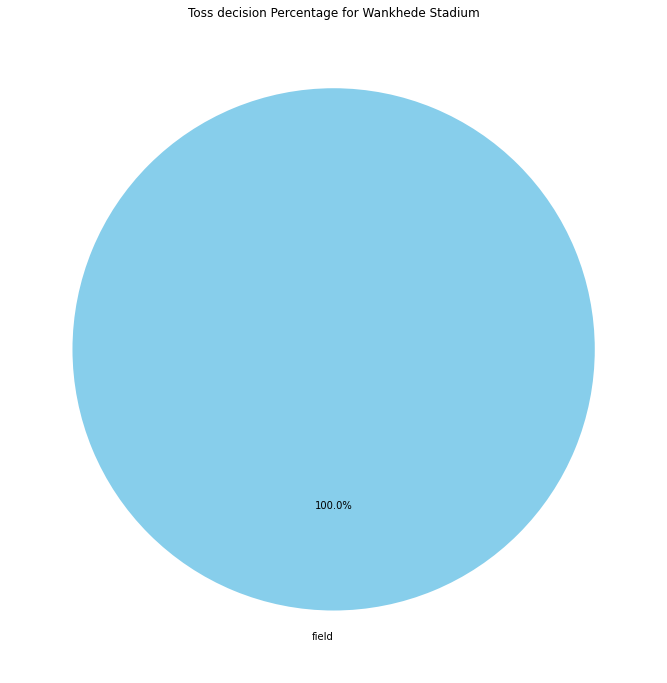

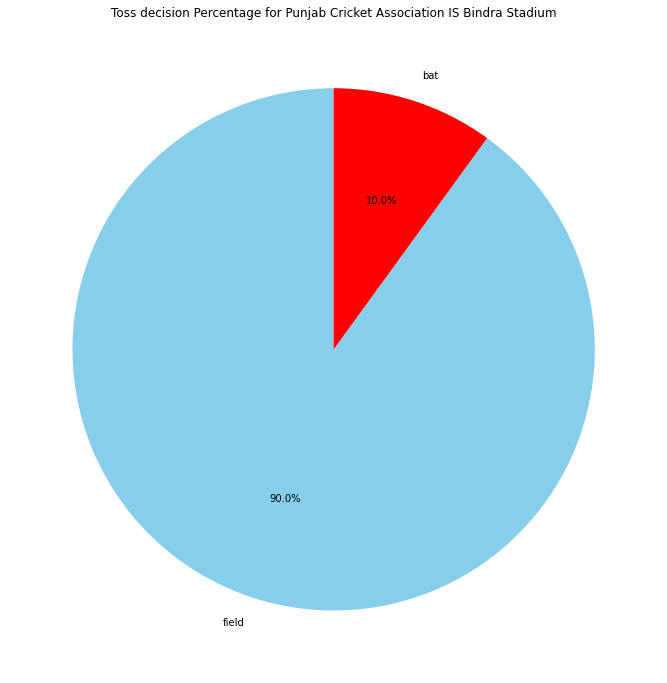

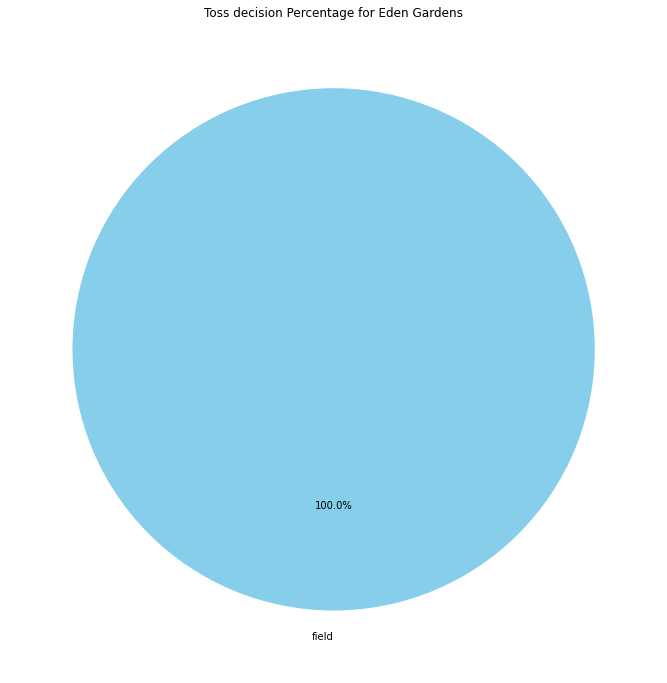

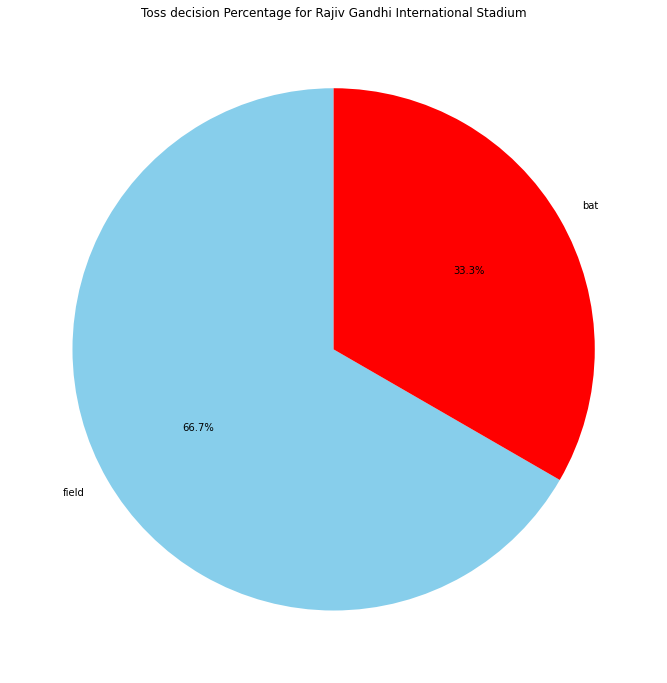

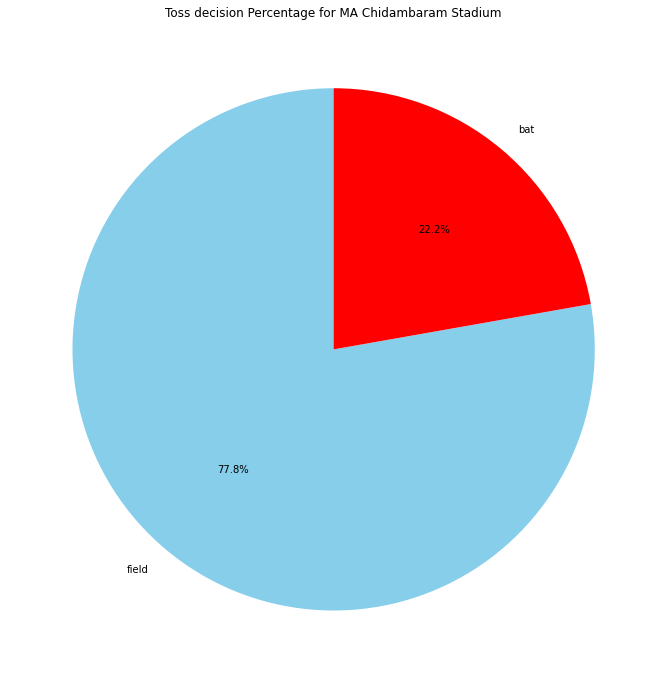

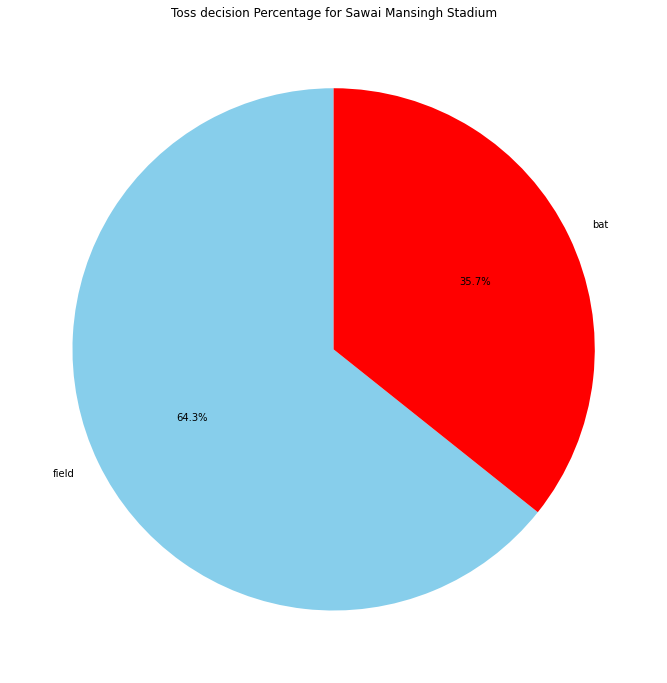

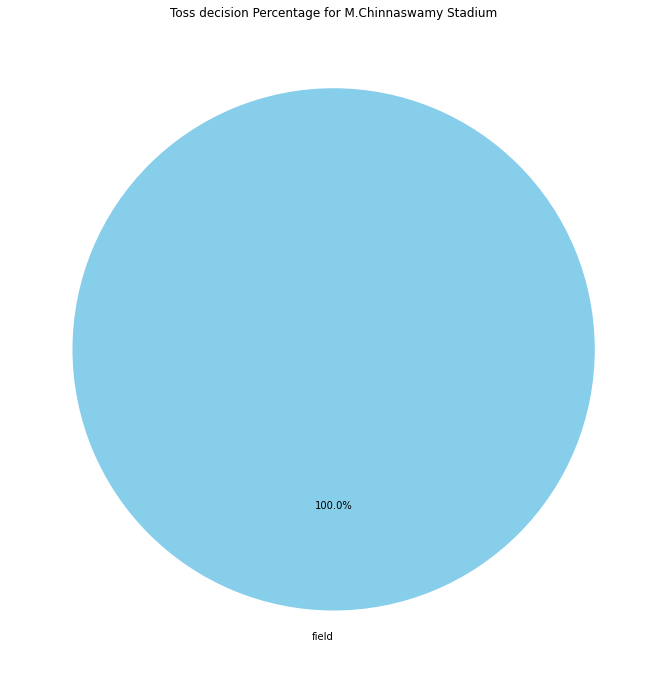

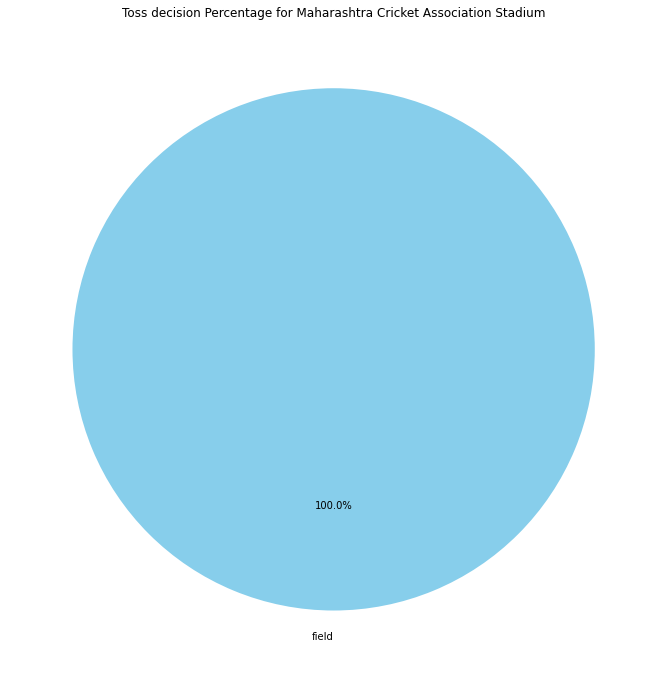

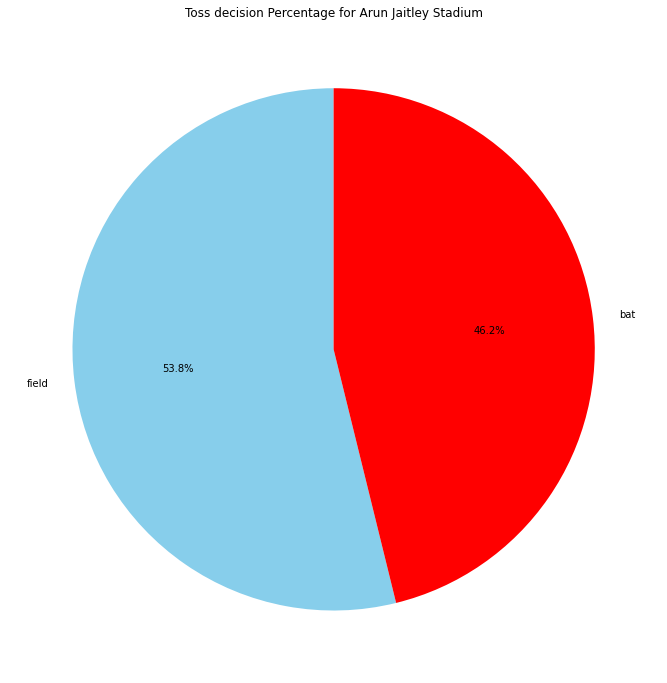

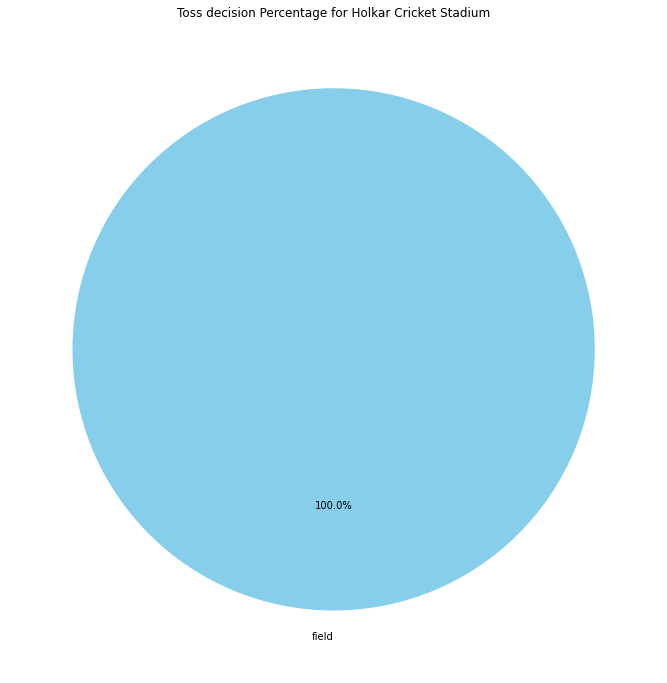

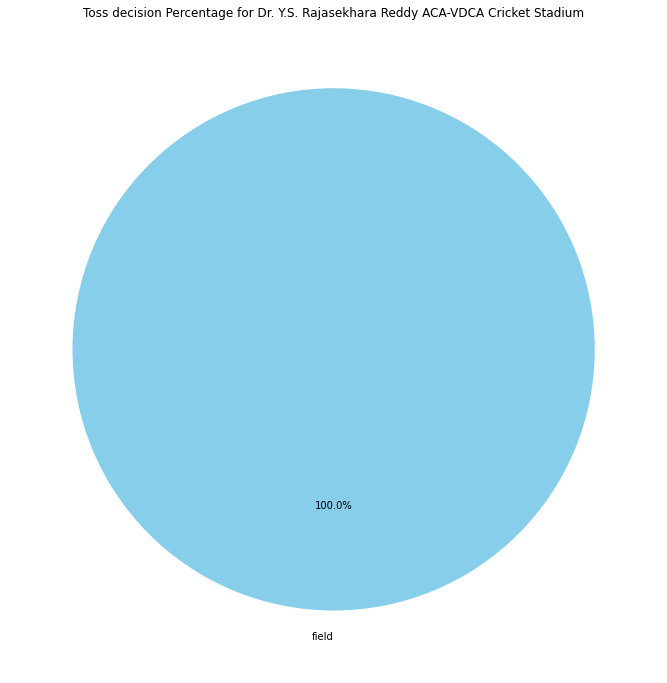

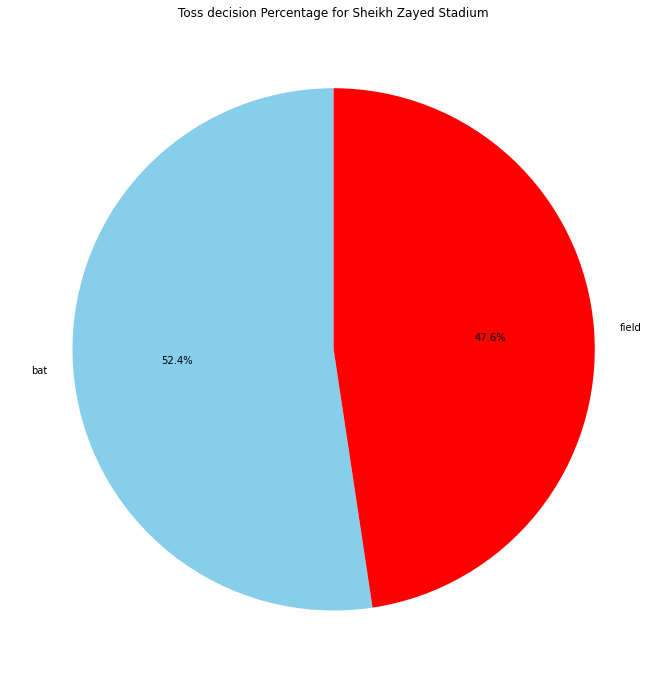

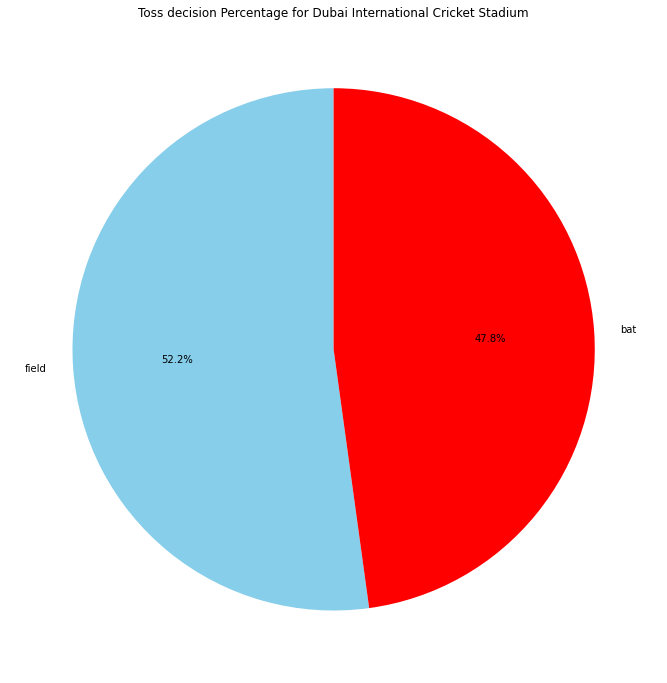

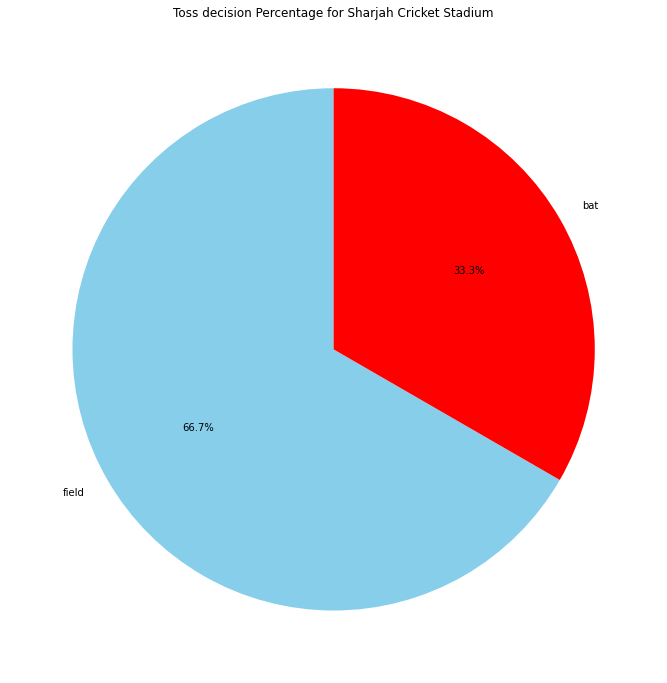

In [19]:
hf.toss_decision_plots(match_info,total_venues)

Teams mostly choose to bowl first as setting a target and chasing it is more achievable but the venue also plays an important role as if the pitch is Hard and Flat or Dry, Batting is preferred and if there is grass on the pitch, Bowling is preferred.

The pitch conditions in UAE (Dubai International Cricket Stadium, Sheikh Zayed Stadium and Sharjah Cricket Stadium) are mostly Dry and Hard and that is why more teams have chosen to bat first there compared to Indian Pitches

In [20]:
year_list = match_info.year.unique().tolist()

In [21]:
print("The dataset contains IPL for the years :- \n")
for year in year_list:
  print(year)

The dataset contains IPL for the years :- 

2018
2019
2020


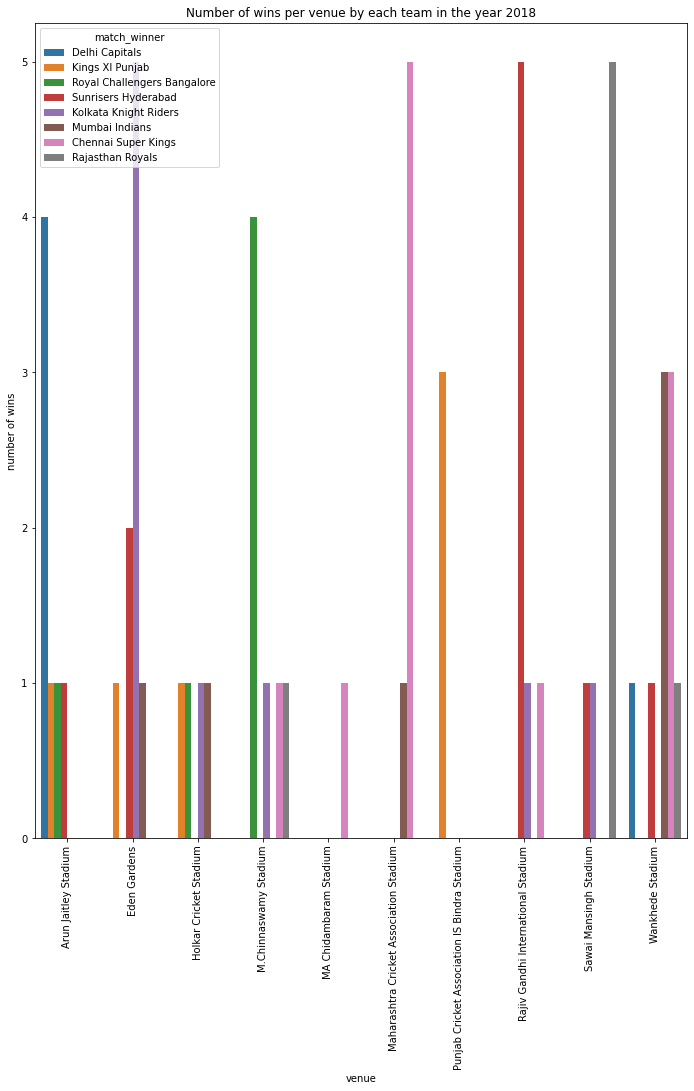

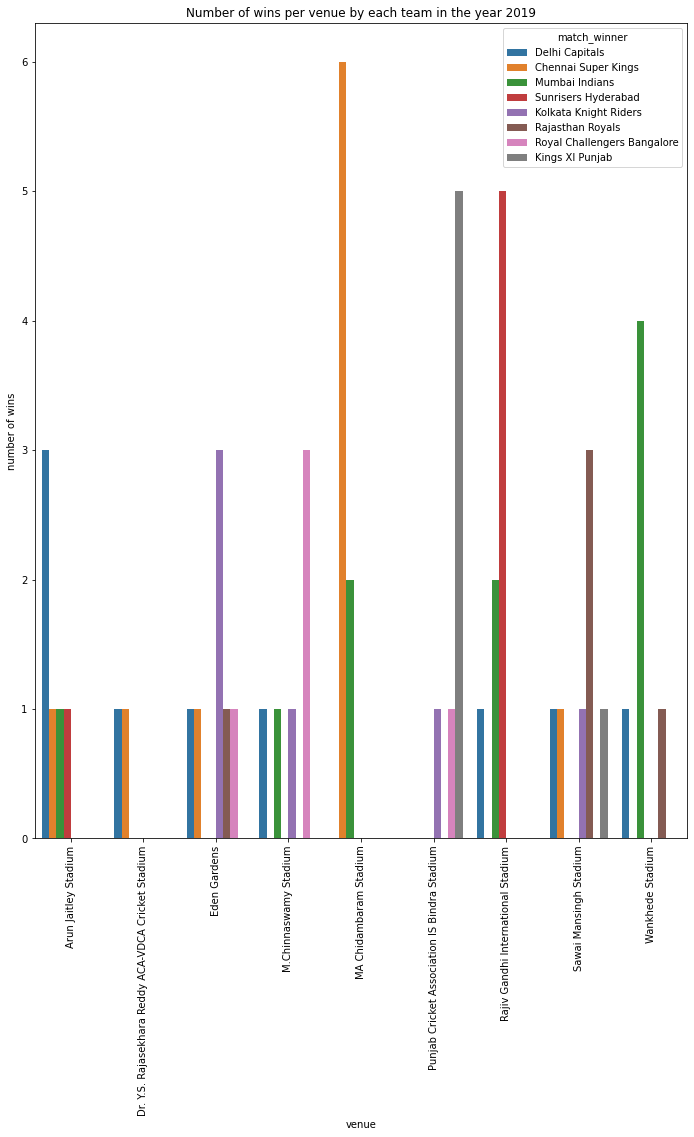

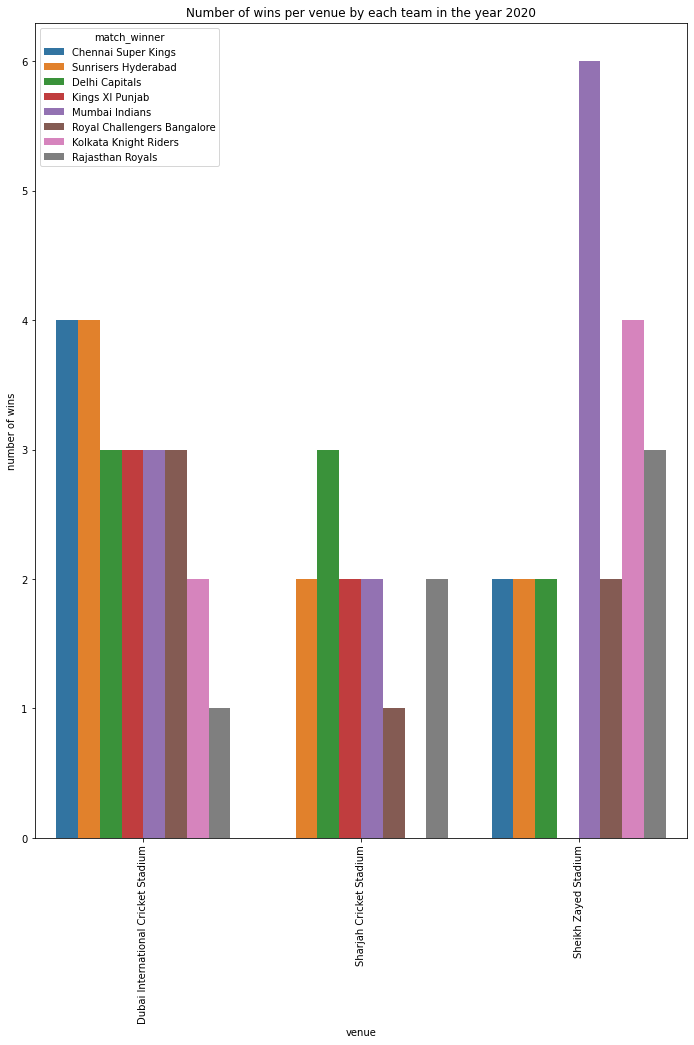

In [22]:
hf.team_wins_per_venue(match_info,year_list)

From the above plot, In the year 2019, it can be seen that one team performs better than most teams at one venue. Kolkata Knight riders have won the most games at Eden Gardens, Chennai Super Kings have won the most games at MA Chidambaram Stadium, Mumbai Indians have won the most games at Wankhede Stadium and so on. This is because these venues are the Homegrounds of those teams.

Teams are more comfortable playing in homegrounds as they have more practice there and therefore, it can be interpreted that venue plays a crucial role in winning a game.

In [23]:
win_team = match_info[['date', 'match_winner']]
win_team = win_team.rename(columns={'date': 'start_date'})

Merging ball by ball dataframe with winning team for further analysis

In [24]:
merged_data = pd.merge(df, win_team, how='outer', on='start_date')

In [25]:
Total_wins = hf.toss_and_match_wins_per_venue(match_info)

In [26]:
print("The Number of games won by batting first and fielding first per venue are :-")
Total_wins

The Number of games won by batting first and fielding first per venue are :-


,venue,Batting first,Fielding_first
0,Sheikh Zayed Stadium,11,10
1,Dubai International Cricket Stadium,11,12
2,Arun Jaitley Stadium,6,7
3,Sawai Mansingh Stadium,5,9
4,Rajiv Gandhi International Stadium,5,10
5,Sharjah Cricket Stadium,4,8
6,MA Chidambaram Stadium,2,7
7,Punjab Cricket Association IS Bindra Stadium,1,9


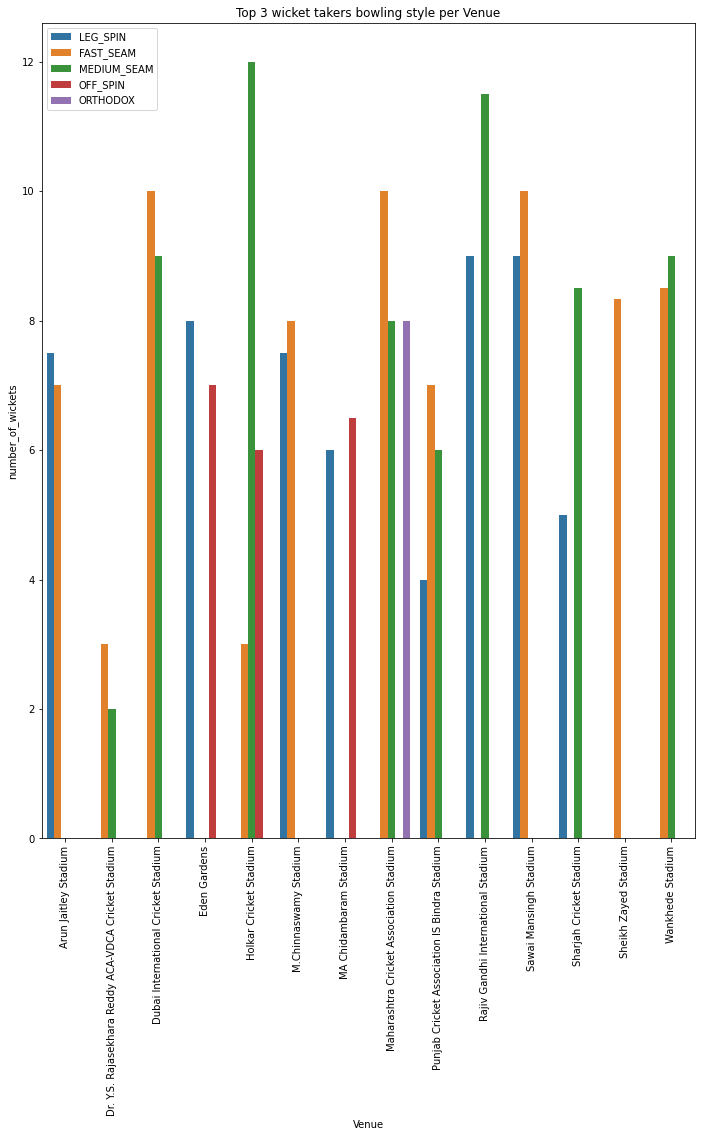

In [27]:
top_wicket_takers = hf.top_wicket_takers_per_venue(total_venues,merged_data,bowler_info)

According to this plot, Venue plays an important role in the bowling line-up picked by the Captain. If the team is going to play at Wankhede stadium, they would be more pace heavy as it favours fast seam and medium seam more than spin.

In [69]:
print("Top 3 Highest Wicket takers per venue and their bowling style: ")
top_wicket_takers

Top 3 Highest Wicket takers per venue and their bowling style: 


,Venue,season,bowler,number_of_wickets,bowling_team,bowl_type,bowl_style
0,Arun Jaitley Stadium,2019,A Mishra,8,Delhi Capitals,Spin,LEG_SPIN
1,Arun Jaitley Stadium,2019,K Rabada,7,Delhi Capitals,Pace,FAST_SEAM
4,Arun Jaitley Stadium,2019,S Lamichhane,7,Delhi Capitals,Spin,LEG_SPIN
5,Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket St...,2019,DL Chahar,2,Chennai Super Kings,Pace,MEDIUM_SEAM
6,Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket St...,2019,DJ Bravo,2,Chennai Super Kings,Pace,MEDIUM_SEAM
7,Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket St...,2019,KMA Paul,3,Delhi Capitals,Pace,FAST_SEAM
8,Dubai International Cricket Stadium,2020/21,SM Curran,9,Chennai Super Kings,Pace,MEDIUM_SEAM
10,Dubai International Cricket Stadium,2020/21,TA Boult,11,Mumbai Indians,Pace,FAST_SEAM
11,Dubai International Cricket Stadium,2020/21,JC Archer,9,Rajasthan Royals,Pace,FAST_SEAM
17,Eden Gardens,2018,SP Narine,7,Kolkata Knight Riders,Spin,OFF_SPIN


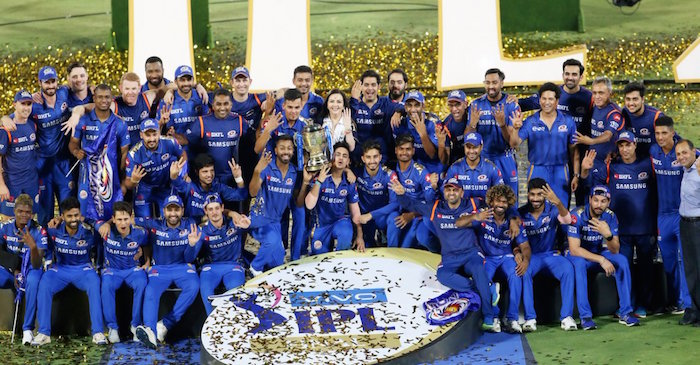

In [44]:
from IPython import display
display.Image("Mumbai-Indians-IPL-2019-Champions.jpg")

# 2019 IPL Champions - Mumbai Indians

Mumbai Indians is one of the most successful IPL franchises, and they won the cup in 2019. The strategies made by the team is analysed to see if the venue at which the game is played had a crucial role in their decision-making process.

In [45]:
df_2019 = df[df['season'] == '2019']

In [46]:
match_info_2019 = match_info[match_info['year'] == 2019]

In [47]:
match_info_2019.head()

,Unnamed: 0,Team1,Team2,date,venue,toss_winner,toss_decision,match_winner,year
60,206,Royal Challengers Bangalore,Chennai Super Kings,2019-03-23,MA Chidambaram Stadium,Chennai Super Kings,field,Chennai Super Kings,2019
61,392,Sunrisers Hyderabad,Kolkata Knight Riders,2019-03-24,Eden Gardens,Kolkata Knight Riders,field,Kolkata Knight Riders,2019
62,156,Delhi Capitals,Mumbai Indians,2019-03-24,Wankhede Stadium,Mumbai Indians,field,Delhi Capitals,2019
63,612,Kings XI Punjab,Rajasthan Royals,2019-03-25,Sawai Mansingh Stadium,Rajasthan Royals,field,Kings XI Punjab,2019
64,56,Delhi Capitals,Chennai Super Kings,2019-03-26,Arun Jaitley Stadium,Delhi Capitals,bat,Chennai Super Kings,2019


Toss Decisions

In [48]:
print("The number of times Mumbai Indians won the toss and match is :-  " +str(len(match_info_2019[(match_info_2019['toss_winner'] == 'Mumbai Indians') & (match_info_2019['match_winner'] == 'Mumbai Indians')])))
print("The number of times Mumbai Indians lost the toss and won the match is :-  "+str(len(match_info_2019[(match_info_2019['toss_winner'] != 'Mumbai Indians') & (match_info_2019['match_winner'] == 'Mumbai Indians')])))
print("The number of times Mumbai Indians won the toss and lost the match is :-  " +str(len(match_info_2019[(match_info_2019['toss_winner'] == 'Mumbai Indians') & (match_info_2019['match_winner'] != 'Mumbai Indians')])))


The number of times Mumbai Indians won the toss and match is :-  5
The number of times Mumbai Indians lost the toss and won the match is :-  5
The number of times Mumbai Indians won the toss and lost the match is :-  2


In [49]:
match_info_2019.groupby(['toss_winner', 'venue'])['toss_winner'].count().unstack('toss_winner').fillna(0)

toss_winner,Chennai Super Kings,Delhi Capitals,Kings XI Punjab,Kolkata Knight Riders,Mumbai Indians,Rajasthan Royals,Royal Challengers Bangalore,Sunrisers Hyderabad
venue,,,,,,,,
Arun Jaitley Stadium,0.0,3.0,0.0,0.0,1.0,1.0,0.0,1.0
Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
Eden Gardens,1.0,1.0,1.0,2.0,1.0,1.0,0.0,0.0
M.Chinnaswamy Stadium,1.0,1.0,1.0,1.0,0.0,0.0,2.0,0.0
MA Chidambaram Stadium,6.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
Punjab Cricket Association IS Bindra Stadium,0.0,1.0,3.0,1.0,0.0,1.0,1.0,0.0
Rajiv Gandhi International Stadium,1.0,0.0,1.0,0.0,1.0,1.0,1.0,3.0
Sawai Mansingh Stadium,1.0,1.0,0.0,1.0,0.0,4.0,0.0,0.0
Wankhede Stadium,1.0,0.0,0.0,0.0,4.0,1.0,0.0,0.0


In [50]:
tnm_info = match_info_2019[match_info_2019['toss_winner'] == match_info_2019['match_winner']]

In [51]:
tnm_info.groupby(['toss_winner', 'venue'])['toss_winner'].count().unstack('toss_winner').fillna(0)

toss_winner,Chennai Super Kings,Delhi Capitals,Kings XI Punjab,Kolkata Knight Riders,Mumbai Indians,Rajasthan Royals,Royal Challengers Bangalore,Sunrisers Hyderabad
venue,,,,,,,,
Arun Jaitley Stadium,0.0,2.0,0.0,0.0,1.0,0.0,0.0,1.0
Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
Eden Gardens,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
M.Chinnaswamy Stadium,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
MA Chidambaram Stadium,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Punjab Cricket Association IS Bindra Stadium,0.0,0.0,3.0,1.0,0.0,0.0,1.0,0.0
Rajiv Gandhi International Stadium,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
Sawai Mansingh Stadium,1.0,1.0,0.0,1.0,0.0,3.0,0.0,0.0
Wankhede Stadium,0.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0


Toss Decisions did not play a huge role in Mumbai's victory in the year 2019 but out of the 4 times they won the toss and chose to field at Wankhede Stadium, they won the game 3 times.This means that they had good bowlers who could bowl at this pitch and good batsmen to chase any total and that is because Wankhede Stadium is the homeground for Mumbai Indians. Therefore, it can be inferred that Venue played an important role here.

Overall Batsman stats for IPL 2019

In [70]:
batting_data_2019 = hf.get_batting_data(df_2019)
batting_data_2019.head(20)

,Player,Runs Scored,Balls Faced,Times Dismissed,Innings Played,Batting Average,Batting Strike Rate
0,A Mishra,21,24,2,4,10.500000,87.500000
1,AB de Villiers,442,287,10,13,44.200000,154.006969
2,AD Nath,61,57,5,5,12.200000,107.017544
3,AD Russell,514,252,10,13,51.400000,203.968254
4,AJ Turner,3,10,3,4,1.000000,30.000000
5,AM Rahane,393,285,12,13,32.750000,137.894737
6,AR Patel,110,88,6,12,18.333333,125.000000
7,AT Rayudu,282,303,12,17,23.500000,93.069307
8,Abhishek Sharma,9,9,2,3,4.500000,100.000000
9,B Kumar,12,19,3,4,4.000000,63.157895


Top 15 batsman stats in each venue for IPL 2019


In [76]:
batting_data_2019 = hf.batting_stat(df_2019)
batting_data_2019.head(20)

,Player,Runs Scored,Balls Faced,Times Dismissed,Innings Played,Batting Average,Batting Strike Rate,venue,batting_team
0,S Dhawan,236,181,7,7,33.714286,130.386740,Arun Jaitley Stadium,Delhi Capitals
1,SS Iyer,236,196,7,7,33.714286,120.408163,Arun Jaitley Stadium,Delhi Capitals
2,RR Pant,120,102,6,7,20.000000,117.647059,Arun Jaitley Stadium,Delhi Capitals
3,AR Patel,76,56,2,6,38.000000,135.714286,Arun Jaitley Stadium,Delhi Capitals
4,CA Ingram,59,56,6,6,9.833333,105.357143,Arun Jaitley Stadium,Delhi Capitals
5,CH Gayle,69,37,1,1,69.000000,186.486486,Arun Jaitley Stadium,Kings XI Punjab
6,AD Russell,66,31,2,1,33.000000,212.903226,Arun Jaitley Stadium,Kolkata Knight Riders
7,Q de Kock,35,27,1,1,35.000000,129.629630,Arun Jaitley Stadium,Mumbai Indians
8,PP Shaw,193,135,7,7,27.571429,142.962963,Arun Jaitley Stadium,Delhi Capitals
9,R Parag,50,49,1,1,50.000000,102.040816,Arun Jaitley Stadium,Rajasthan Royals


Mumbai Indians Batsmen who were in the top 15

In [73]:
batting_stat_mi_2019 = batting_data_2019[batting_data_2019['batting_team'] == 'Mumbai Indians']
batting_stat_mi_2019

,Player,Runs Scored,Balls Faced,Times Dismissed,Innings Played,Batting Average,Batting Strike Rate,venue,batting_team
7,Q de Kock,35,27,1,1,35.000000,129.629630,Arun Jaitley Stadium,Mumbai Indians
39,HH Pandya,91,34,1,1,91.000000,267.647059,Eden Gardens,Mumbai Indians
53,RG Sharma,48,33,1,1,48.000000,145.454545,M.Chinnaswamy Stadium,Mumbai Indians
59,SA Yadav,38,24,1,1,38.000000,158.333333,M.Chinnaswamy Stadium,Mumbai Indians
64,RG Sharma,71,50,2,2,35.500000,142.000000,MA Chidambaram Stadium,Mumbai Indians
84,Q de Kock,60,39,1,1,60.000000,153.846154,Punjab Cricket Association IS Bindra Stadium,Mumbai Indians
92,Ishan Kishan,40,47,2,2,20.000000,85.106383,Rajiv Gandhi International Stadium,Mumbai Indians
100,Q de Kock,48,35,2,2,24.000000,137.142857,Rajiv Gandhi International Stadium,Mumbai Indians
113,Q de Kock,65,47,1,1,65.000000,138.297872,Sawai Mansingh Stadium,Mumbai Indians
120,KA Pollard,139,73,4,5,34.750000,190.410959,Wankhede Stadium,Mumbai Indians


Top 15 bowlers stats in each venue for IPL 2019

In [75]:
bowling_data_2019 = hf.bowling_stat(df_2019)
bowling_data_2019.head(20)

,Bowler,Balls Bowled,Runs Conceded,Wickets Taken,innings_played,Economy Rate,Balls Per Wicket,Bowling Average,venue,bowling_team
0,K Rabada,145,198.0,10,6,8.193103,14.500000,19.800000,Arun Jaitley Stadium,Delhi Capitals
1,TA Boult,24,27.0,2,1,6.750000,12.000000,13.500000,Arun Jaitley Stadium,Delhi Capitals
2,Kuldeep Yadav,24,41.0,2,1,10.250000,12.000000,20.500000,Arun Jaitley Stadium,Kolkata Knight Riders
3,AR Patel,138,115.0,5,6,5.000000,27.600000,23.000000,Arun Jaitley Stadium,Delhi Capitals
4,YS Chahal,24,41.0,2,1,10.250000,12.000000,20.500000,Arun Jaitley Stadium,Royal Challengers Bangalore
5,HV Patel,24,40.0,2,1,10.000000,12.000000,20.000000,Arun Jaitley Stadium,Delhi Capitals
6,GC Viljoen,24,39.0,2,1,9.750000,12.000000,19.500000,Arun Jaitley Stadium,Kings XI Punjab
7,DJ Bravo,24,33.0,3,1,8.250000,8.000000,11.000000,Arun Jaitley Stadium,Chennai Super Kings
8,S Lamichhane,90,137.0,5,4,9.133333,18.000000,27.400000,Arun Jaitley Stadium,Delhi Capitals
9,S Kaul,24,35.0,2,1,8.750000,12.000000,17.500000,Arun Jaitley Stadium,Sunrisers Hyderabad


Mumbai Indians Bowlers who were in the top 15

In [56]:
bowling_stat_mi_2019 = bowling_data_2019[bowling_data_2019['bowling_team'] == 'Mumbai Indians']
bowling_stat_mi_2019

,Bowler,Balls Bowled,Runs Conceded,Wickets Taken,innings_played,Economy Rate,Balls Per Wicket,Bowling Average,venue,bowling_team
13,RD Chahar,24,19.0,3,1,4.750000,8.000000,6.333333,Arun Jaitley Stadium,Mumbai Indians
43,RD Chahar,24,54.0,1,1,13.500000,24.000000,54.000000,Eden Gardens,Mumbai Indians
57,JJ Bumrah,24,20.0,3,1,5.000000,8.000000,6.666667,M.Chinnaswamy Stadium,Mumbai Indians
64,KH Pandya,42,28.0,3,2,4.000000,14.000000,9.333333,MA Chidambaram Stadium,Mumbai Indians
65,SL Malinga,40,63.0,4,2,9.450000,10.000000,15.750000,MA Chidambaram Stadium,Mumbai Indians
67,JJ Bumrah,42,41.0,2,2,5.857143,21.000000,20.500000,MA Chidambaram Stadium,Mumbai Indians
73,RD Chahar,48,35.0,2,2,4.375000,24.000000,17.500000,MA Chidambaram Stadium,Mumbai Indians
79,KH Pandya,24,43.0,2,1,10.750000,12.000000,21.500000,Punjab Cricket Association IS Bindra Stadium,Mumbai Indians
90,RD Chahar,48,35.0,3,2,4.375000,16.000000,11.666667,Rajiv Gandhi International Stadium,Mumbai Indians
99,AS Joseph,22,12.0,6,1,3.272727,3.666667,2.000000,Rajiv Gandhi International Stadium,Mumbai Indians


In [57]:
match_info[match_info['venue'] == 'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium']


,Unnamed: 0,Team1,Team2,date,venue,toss_winner,toss_decision,match_winner,year
114,309,Sunrisers Hyderabad,Delhi Capitals,2019-05-08,Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket St...,Delhi Capitals,field,Delhi Capitals,2019
115,854,Delhi Capitals,Chennai Super Kings,2019-05-10,Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket St...,Chennai Super Kings,field,Chennai Super Kings,2019


Mumbai Indians have strategized their team in such a way that they have players who have strengths at each venue and that can be inferred from the batting_stat_mi_2019 and bowling_stat_mi_2019 dataframes. For example, JJ Bumrah is a fast seam bowler and has one of the best bowling figures in Wankhede Stadium which is a pace friendly pitch and RD Chahar is a spin bowler who has excellent figures in Rajiv Gandhi International Stadium which is a spin and medium pace friendly pitch.

Overall Mumbai Indians Stats in IPL 2019 per Venue

In [59]:
!pip install pandarallel

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for pandarallel: filename=pandarallel-1.6.3-py3-none-any.whl size=16462 sha256=f625ca5f89c4fc3e5fbe9509a37fc169537dfb77d0d3a800cf9c32687fd5af61
  Stored in directory: /root/.cache/pip/wheels/16/f5/91/d7efa7c4911ae1cf1aff825f902382eb69a1855f9987a7d17c
Successfully built pandarallel


In [80]:
from pandarallel import pandarallel

pandarallel.initialize(progress_bar=False, nb_workers=6) 

INFO: Pandarallel will run on 6 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.


Function With Parallel Processing

pandarallel is a simple and efficient tool to parallelize Pandas operations on all available CPUs.

In [81]:
def pandarallel_batsman_pos(mi_20199):
  '''
  This function returns the batsmen in striker and non striker positions in the ball by ball dataframe

  :param mi_20199: dataframe with ball by ball data for Mumbai Indians at each venue
  :return pos: batsmen in striker and non striker positions
  '''
  pos= []
  pos.append(mi_20199.parallel_apply(lambda x: x['striker'] if x['striker']  <  x['non_striker'] else x['non_striker'], axis=1))
  pos.append(mi_20199.parallel_apply(lambda x: x['non_striker'] if x['striker']  <  x['non_striker'] else x['striker'], axis=1))
  return pos


In [82]:
mi_2019 = match_info_2019[(match_info_2019['Team1'] == 'Mumbai Indians') |(match_info_2019['Team2'] == 'Mumbai Indians')]
venues = mi_2019.venue.unique().tolist()

for v in venues:
    data = mi_2019[mi_2019['venue'] == v]
    matches_won = data[data['match_winner'] == 'Mumbai Indians']
    toss_win_and_bat_win = data[(data['toss_winner'] == 'Mumbai Indians') & (data['toss_decision'] == 'bat') & (data['match_winner'] == 'Mumbai Indians')]
    toss_win_and_field_win =  data[(data['toss_winner'] == 'Mumbai Indians') & (data['toss_decision'] == 'field') & (data['match_winner'] == 'Mumbai Indians')]
    final_over_bowler = df_2019[(df_2019['venue'] == v) &(df_2019['bowling_team'] == 'Mumbai Indians')& (df_2019['ball'] == 19.1)]['bowler'].value_counts().to_frame().reset_index()
    df_rg = df_2019[(df_2019['venue'] == v) & (df_2019['striker'] =='RG Sharma')]
    df_rg1 = df_rg.groupby(["striker","bowling_team","start_date"]).runs_off_bat.sum().reset_index()
    df_rg2 = df_rg1[['start_date','bowling_team','striker','runs_off_bat']]
    df_rg2 = df_rg2.rename(columns = {'start_date' : 'Match_date' , 'runs_off_bat' : 'Runs_Scored'})
    total_runs = df_rg2['Runs_Scored'].sum()
    df_rg2 = df_rg2.assign(Runs_Average_per_venue = lambda x: (x['Runs_Scored']/ total_runs) *100)
    mi_20199 = df_2019[(df_2019['batting_team'] == 'Mumbai Indians') & (df_2019['venue'] == v)]
    pos = pandarallel_batsman_pos(mi_20199)
    mi_20199['first_batter']  =  pos[0]   #mi_20199.parallel_apply(lambda x: x['striker'] if x['striker']  <  x['non_striker'] else x['non_striker'], axis=1)
    mi_20199['second_batter'] =  pos[1]    #mi_20199.parallel_apply(lambda x: x['non_striker'] if x['striker']  <  x['non_striker'] else x['striker'], axis=1)
    
    partnership_data = mi_20199.groupby(['start_date','first_batter', 'second_batter','bowling_team'])\
                        .agg(partnership=('runs_conceded','sum')).reset_index()
    partnership_data = partnership_data.sort_values(by=['start_date','bowling_team','partnership'],ascending = False)

    print("\nMUMBAI INDIANS Statistics at " + v + ": \n")
    print("Number of matches played at " + v + " is " + str(data.shape[0]))
    print("Number of matches won at " + v+" is " + str(matches_won.shape[0]))
    print("Toss wins and chose batting and won the game : " + str(toss_win_and_bat_win.shape[0]))
    print("Toss wins and chose fielding and won the game : " + str(toss_win_and_field_win.shape[0]))
    if len(final_over_bowler) == 1:
      print("The best death over bowler in this venue is " + str(final_over_bowler['index'][0]))
    elif len(final_over_bowler) > 1:
      print("The best death over bowlers in this venue are " + str(final_over_bowler['index'][0]) + " and " + final_over_bowler['index'][1])
    else:
      print()
    print("The best opening batsmen in this venue are " +str(mi_20199[mi_20199['ball'] == 0.1]['first_batter'].mode().values[0]) +" and " +str(mi_20199[mi_20199['ball'] == 0.1]['second_batter'].mode().values[0]))
    print("The captain's performance in this venue this season : \n")
    print(df_rg2)
    print(" \nTop 2 Biggest partnerships by Mumbai Indians this season in this venue : \n")
    print(partnership_data.head(2))
    print("\n\n")


MUMBAI INDIANS Statistics at Wankhede Stadium: 

Number of matches played at Wankhede Stadium is 6
Number of matches won at Wankhede Stadium is 4
Toss wins and chose batting and won the game : 0
Toss wins and chose fielding and won the game : 3
The best death over bowlers in this venue are HH Pandya and JJ Bumrah
The best opening batsmen in this venue are Q de Kock and RG Sharma
The captain's performance in this venue this season : 

   Match_date                 bowling_team    striker  Runs_Scored  Runs_Average_per_venue
0  2019-04-03          Chennai Super Kings  RG Sharma           13                7.182320
1  2019-03-24               Delhi Capitals  RG Sharma           14                7.734807
2  2019-05-05        Kolkata Knight Riders  RG Sharma           55               30.386740
3  2019-04-13             Rajasthan Royals  RG Sharma           47               25.966851
4  2019-04-15  Royal Challengers Bangalore  RG Sharma           28               15.469613
5  2019-05-02  

# RESULT

It can be inferred that other than their Home ground (Wankhede Stadium), Mumbai Indians won all the games they played at MA Chidambaram Stadium, Arun Jaitley Stadium, Rajiv Gandhi International Stadium and M.Chinnaswamy Stadium but lost the games they played at Eden Gardens, Punjab Cricket Association IS Bindra Stadium and Sawai Mansingn Stadium. They performed better in some venues because of the team selection such as Bowlers based on different pitch conditions and toss decisions such as Choosing to Field in Wankhede Stadium, and they made these decisions with respect to each venue which can be inferred from the analysis done and that led them to win the IPL cup. In conclusion, Teams that adhere to pitch conditions(Venue) increase their chances of winning the game.